# Project Name: Healthcare PGP

In [2]:
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns  

%matplotlib inline

In [1]:
df=pd.read_csv(r'C:\Users\Anuj Bhalla\Downloads\Project_2\Project 2\Healthcare - Diabetes\health care diabetes.csv')

<IPython.core.display.Javascript object>

## Project Task: Week 2

In [25]:
'''

Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. 
Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

'''

'\n\nData Exploration:\n\n1. Check the balance of the data by plotting the count of outcomes by their value. \nDescribe your findings and plan future course of action.\n\n2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.\n\n3. Perform correlation analysis. Visually explore it using a heat map.\n\n'

C:\Users\Anuj Bhalla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Count of class is:
 0    500
1    268
Name: Outcome, dtype: int64


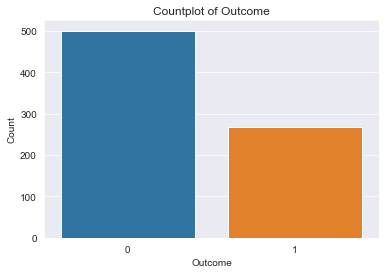

In [26]:
sns.set_style('darkgrid')
sns.countplot(df['Outcome'])
plt.title("Countplot of Outcome")
plt.xlabel('Outcome')
plt.ylabel("Count")
print("Count of class is:\n",df['Outcome'].value_counts())

#### We can see that both class is balanced so we need not to perform any sampling method to maintain the balance between both classes. Therefore I'm directly using this data in training and testing purpose without performing any sampling method. Meanwhile during Model Validation , we also need not worry about ROC Curve because data is not imbalanced, but as this is a health/medical data so I am planning to use ROC curve to make sure TYPE 2 ERROR is not there.

### Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

Text(0.5, 1.0, 'Scatter plot between variables')

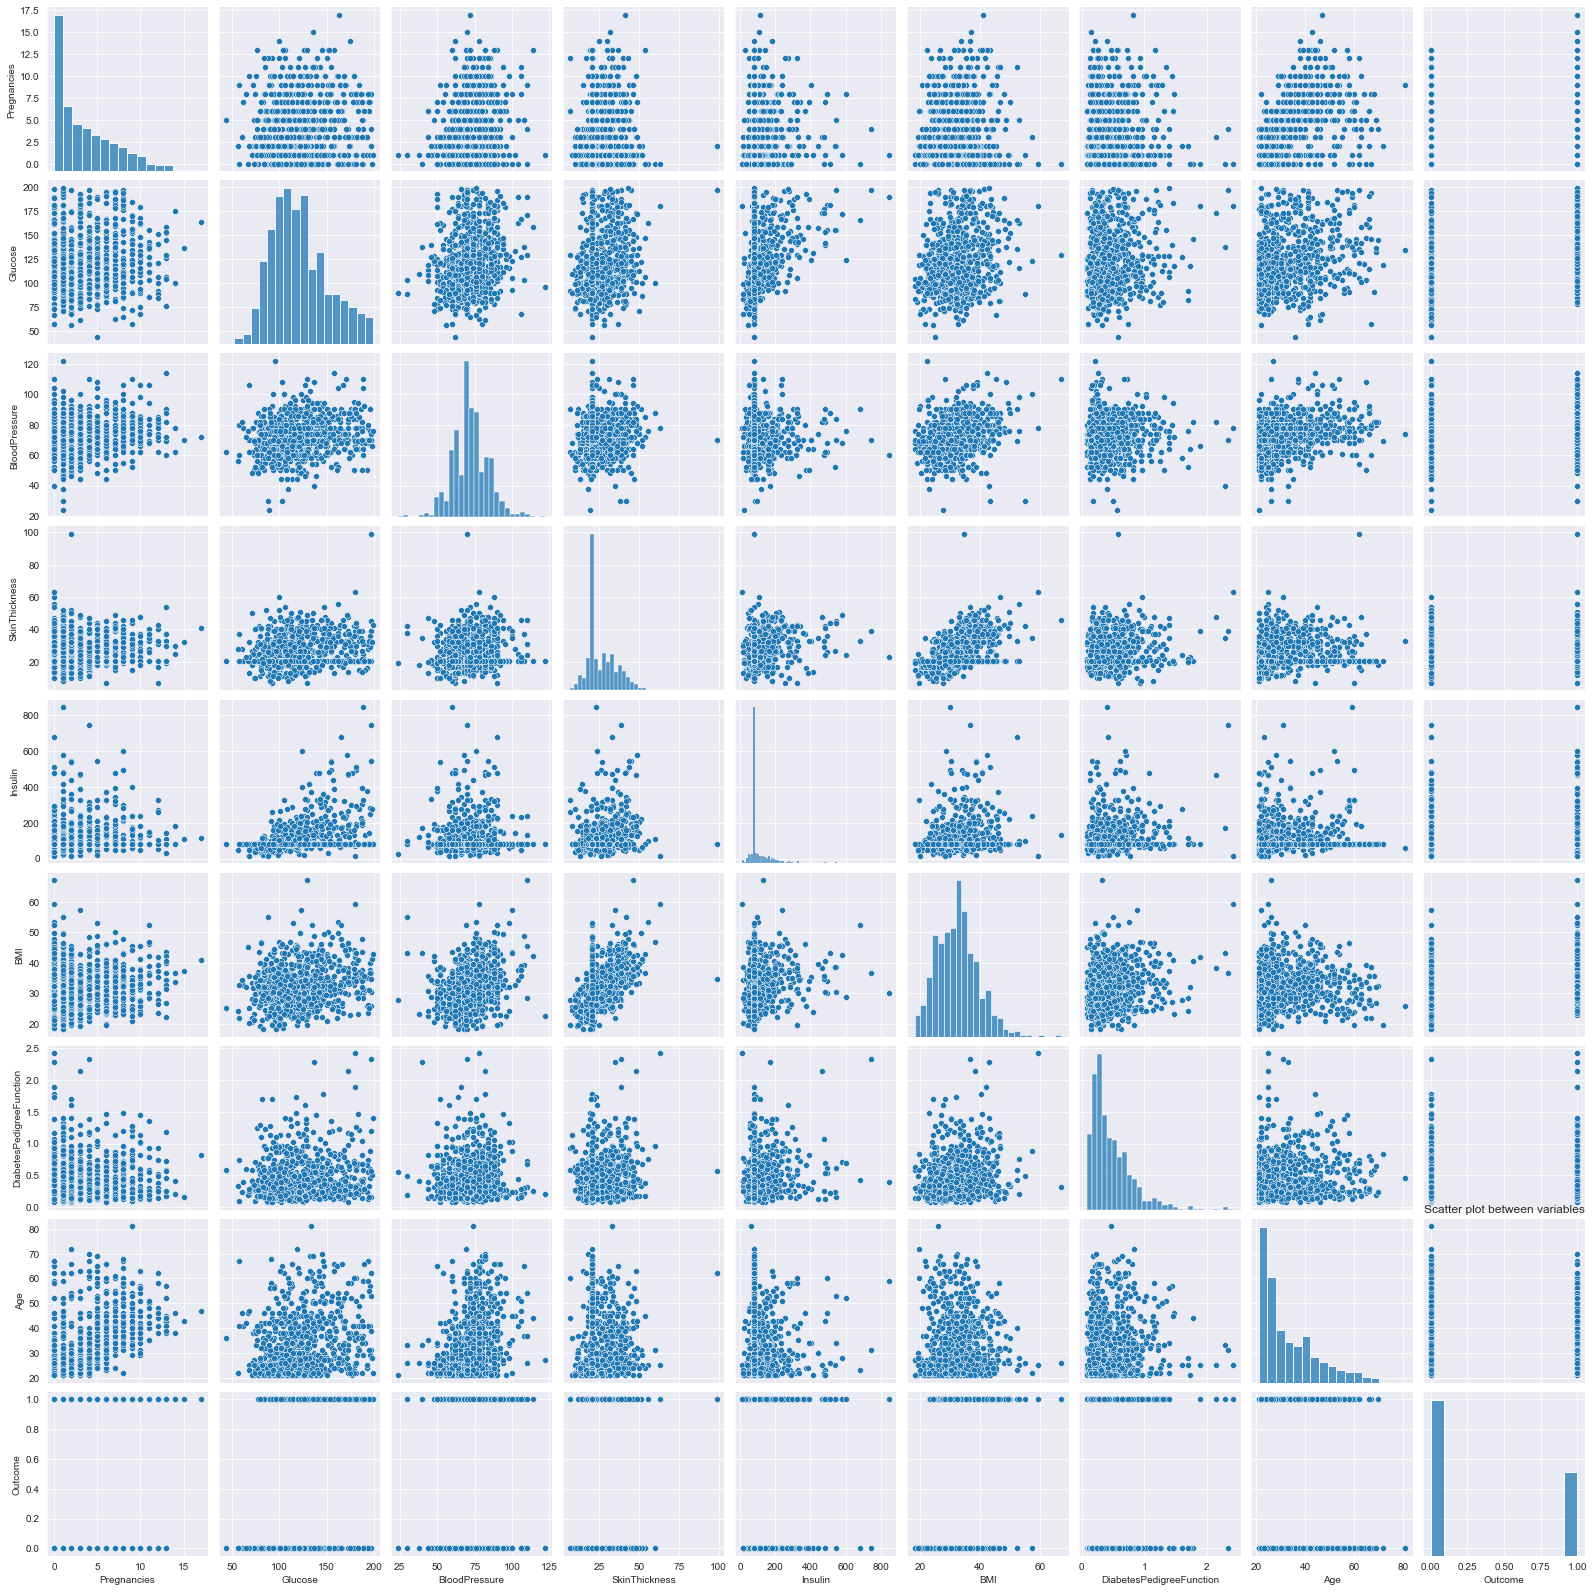

In [27]:
sns.pairplot(df)
plt.title('Scatter plot between variables')

#### We can see from scatter plot that there is no strong multicolinearity among features, but between skin thickness and BMI, Pregnancies and age it looks like there is small chance of positive correlation..i will explore more when analyzing correlation

In [28]:
Glucose = df['Glucose']
BloodPressure=df['BloodPressure']
Outcome=df['Outcome']
BMI=df['BMI']
Insulin=df['Insulin']
SkinThickness=df['SkinThickness']

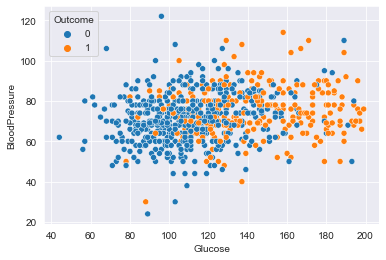

In [29]:
g = sns.scatterplot(x= "Glucose" ,y= "BloodPressure",
              hue="Outcome",
              data=df);

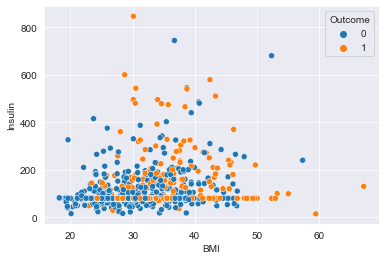

In [30]:
B =sns.scatterplot(x= "BMI" ,y= "Insulin",
              hue="Outcome",
              data=df);

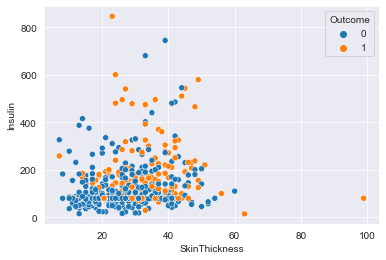

In [31]:
S =sns.scatterplot(x= "SkinThickness" ,y= "Insulin",
              hue="Outcome",
              data=df);

### from the scatter plot patterns between variables we can see that BMI and Blood Pressure is most important feature in prediction followed by Glucose and Age.

###  Perform correlation analysis. Visually explore it using a heat map.

In [32]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


<AxesSubplot:>

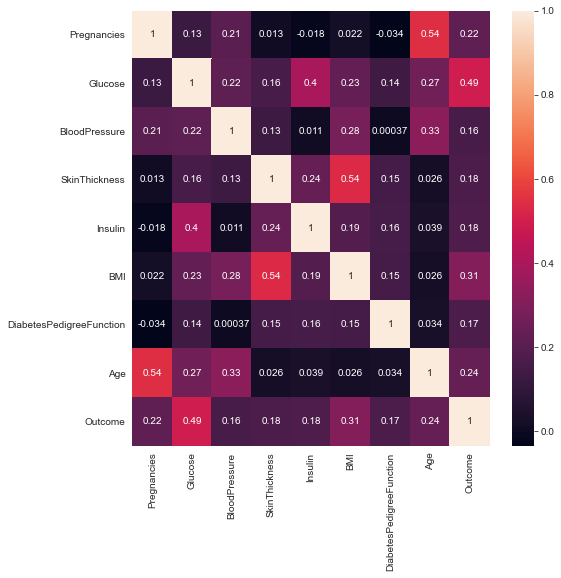

In [34]:
plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)  ### gives correlation value

#### ''' From the HeatMap, we can see that Majority of the correlations are "Positive", but weak. Strongest correlated pairs are
#### "BMI : Skin Thickness", 
#### "Age : Pregnancies", 
#### "Glucose : Outcome(Target Variable)",
#### "Insulin : Glucose"'''